<a href="https://colab.research.google.com/github/parthasarathi1234/DL_assignment_1/blob/main/DL_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data();
x_train_images, x_validation_images,y_train_labels, y_validation_labels  = train_test_split(x_train,y_train,test_size = 0.1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(x_train_images.shape,x_validation_images.shape,y_train_labels.shape,y_validation_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


#Question1

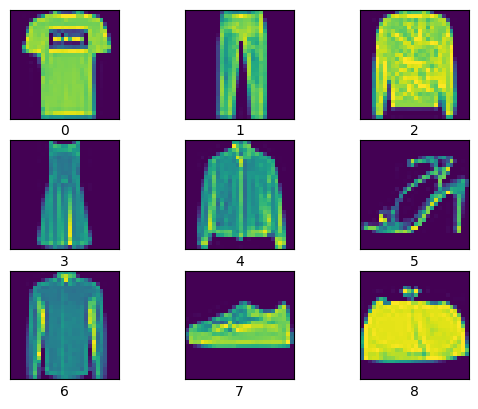

In [2]:
n=0
i=0
while(n!=9):
  if(y_train[i]==n):
    plt.subplot(3,3,n+1)
    n=n+1

    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
  i=i+1

plt.show()

#Question 2


### weights generation   ,   Activation functions

In [5]:
def weight(No_of_layers,neurons,weightInit):
  weights=[]
  bias=[]


  if(weightInit=='random'):
  # input layer
    weights.append(0.01*np.random.randn(neurons,784))
    bias.append(0.01*np.random.randn(neurons,1))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(0.01*np.random.randn(neurons,neurons))
      bias.append(0.01*np.random.randn(neurons,1))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(0.01*np.random.randn(10,1))


  else:
    # input layer
    weights.append(0.01*np.random.randn(neurons,784))
    bias.append(np.zeros((neurons,1)))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(0.01*np.random.randn(neurons,neurons))
      bias.append(np.zeros((neurons,1)))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(np.zeros((10,1)))

  return weights,bias



def sigmoid(a):
  z=np.clip(a,-500, 500)
  return 1 / (1 + np.exp(-z))

def tanh(a):
  z=np.clip(a,-50,50)
  return np.tanh(z)

def softmax(a):
  x=1e-6
  return (np.exp(a-max(a))/(sum(np.exp(a-max(a)))+x))

def tanh_derivative(z):
  return 1-np.tanh(z)**2

def relu(Z):
    A = np.maximum(0, Z)
    return A

def relu_derivative(z):
  return np.where(z>0,1,0)

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

### weights for different neurons in each layer

In [ ]:
  # for i in range(No_of_layers):
  #   neurons.append(int(input()))   # storing no of neurons in each layer

  # weights=[]
  # bias=[]


  # # input layer
  # weights.append(np.random.randn(neurons[0],784))
  # bias.append(np.random.randn(neurons[0],1))

  # # Hidden layer

  # for i in range(1,No_of_layers):
  #   weights.append(np.random.randn(neurons[i],neurons[i-1]))
  #   bias.append(np.random.randn(neurons[i],1))

  # # output layer
  # weights.append(np.random.randn(10,neurons[No_of_layers-1]))
  # bias.append(np.random.randn(10,1))
  # return weights,bias

  # print(len(weights))
  # for i in range(len(weights)):
  #   print(weights[i].shape)

  # for i in range(len(weights)):
  #   print(bias[i].shape)

### forward propagation   , Backward propagation   , Accuracy

In [35]:
def  feeb_forward(x,layers,act,wei,b):
  pre_activation=[0 for i in range(layers+1)]
  activation=[0 for i in range(layers+1)]
  z=x.flatten().reshape(784,1)/255.0
  # activation.append(z)
  # activation[0]=z
  for i in range(layers):
    # print(weights[i].shape,z.shape,b[i].shape)
    if(i==0):
      a=np.matmul(wei[i],z)+b[i]
      pre_activation[i]=a
    else:
      a=b[i]+np.matmul(wei[i],z)  # pre activation
      # 243/'k'
      pre_activation[i]=a
    if(act=="sigmoid"):
      z=sigmoid(a)
    elif(act=="tanh"):
      z=tanh(a)
    else:
      z=relu(a)
    activation[i]=z

  a=b[layers]+np.matmul(wei[layers],z)
  pre_activation[layers]=a
  z=np.copy(softmax(a))
  activation[layers]=z
  return pre_activation,activation,z

def back_propagation(x_t,y_train,z,H,A,layers,W,activation):
  update_x=x_t.reshape(784,1)/255.0
  dw=[0 for i in range(layers+1)]
  db=[0 for i in range(layers+1)]
  y=np.zeros((10,1))
  y[y_train]=1;
  # loss=-np.subtract(y,z)
  loss=-(y-H[layers])
  for k in range(len(W)-1,0,-1):
    # print(loss.shape,H[k].shape,z.shape,y.shape)
    loss_dw=np.matmul(loss,(H[k-1].T))
    dw[layers]=loss_dw

    loss_db=loss
    db[layers]=loss_db

    loss_dh=np.matmul((W[k].T),loss)

    if(activation=="tanh"):
      x=tanh_derivative(A[k-1])
    elif(activation=="sigmoid"):
      x=sigmoid_derivative(A[k-1])
    else:
      x=relu_derivative(A[k-1])
    loss=np.multiply(loss_dh,x)
  dw[0]=np.matmul(loss,update_x.T)
  db[0]=np.copy(loss)
  return dw,db

def accuracy(theta_w,theta_b,X,Y,activationfun,layers):
  print("accuracy")
  count=0
  loss=0
  # print(X.shape)
  for train_ima,train_labe in zip(X,Y):
    p_act,act,z=feeb_forward(train_ima,layers,activationfun,theta_w,theta_b)
    # print(np.argmax(z),end=",")
    if(np.argmax(z)==train_labe):
      count+=1

    loss+=-np.log(z)[train_labe][0]
    # print(z)
    loss/=Y.shape[0]
    acc=(count/Y.shape[0])
  return acc,loss

# Question 3

### accuracy 2

In [ ]:
def accuracyCalc(train_image,train_label,W,B,layers,activationfun,lossFun):
  a,h,z = feeb_forward(train_image,layers,activationfun,W,B)
  res = np.copy(h[layers])
  maxi = res[0]
  label = 0
  for i in range(1,10):
    if(res[i] > maxi ):
      maxi = res[i]
      label = i
  if(lossFun == 'entropy'):
    # print(train_label)
    return label , -np.log(res[train_label]+(1e-5))
  else:
    a_l = np.zeros((10,1))
    a_l[train_label] = 1
    return label, np.sum((h[n]-a_l)**2)



def validationAccuracy(validation_image,validation_label,W,B,layers,activationfun,lossFun):
  a,h,z = feeb_forward(validation_image,layers,activationfun,W,B)
  res = np.copy(h[layers])
  maxi = res[0]
  label = 0
  for i in range(1,10):
    if(res[i] > maxi ):
      maxi = res[i]
      label = i
  if(lossFun == 'entropy'):
    return label,-np.log(res[validation_label]+(1e-5))
  else:
    a_l = np.zeros((10,1))
    a_l[validation_label] = 1
    return label, np.sum((h[n]-a_l)**2)

### stochastic gradient descent

In [27]:
def stochastic_gradient_descent(epochs,eta,layers,neurons,activation_fun,weightInit,weightDecay):
  W,B=weight(layers,neurons,weightInit)
  for i in range(epochs):
    dw=[[0 for colu in range(row)] for row in range(len(W))]
    db=[[0 for colu in range(row)] for row in range(len(B))]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun)

      for k in range(layers+1):
        print(W[k].shape,current_dw[k].shape)
        W[k]=W[k]-eta*current_dw[k]-(weightDecay*W[k])
        B[k]=B[k]-eta*current_db[k]

    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers)
    print()
    print(acc,loss,v_acc,v_loss)

    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})



def momentum_gradient_descent(epochs,eta,layers,neurons,activation_fun,batchSize,weightInit,weightDecay):
  beta=0.9
  W,B=weight(layers,neurons,weightInit)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    temp=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          v_w=beta*pre_v_w[k]+dw[k]
          v_b=beta*pre_v_b[k]+db[k]

          W[k]=W[k]-(eta*v_w) - (weightDecay * W[k])
          B[k]=B[k]-eta*v_b

          pre_v_w[k]=v_w
          pre_v_b[k]=v_b
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1

    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers)
    print()
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})


def nesterov_accelerated_gradient_descent(epochs,layers,neurons,eta,activation_fun,batchSize,weightInit,weightDecay):
  beta=0.9
  W,B=weight(layers,neurons,weightInit)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]

  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    temp=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]

    for k in range(len(W)):
      W[k] = W[k] - beta * pre_v_w[k]
      B[k] = B[k] - beta * pre_v_b[k]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
          dw[k]+=current_dw[k]
          db[k]+=current_db[k]
          # pre_v_w[k]=eta*dw[k]+beta*pre_v_w[k]
          # pre_v_b[k]=eta*db[k]+beta*pre_v_b[k]
      if(temp%batchSize==0):
        for k in range(len(W)):
          # v_w=beta*pre_v_w[k]+eta*dw[k]
          # v_b=beta*pre_v_b[k]+eta*db[k]

          # W[k]=W[k]-v_w - (weightDecay * W[k])
          # B[k]=B[k]-v_b
          # pre_v_w[k]=v_w
          # pre_v_b[k]=v_b
          W[k]=W[k]-eta*dw[k]-(weightDecay*W[k])
          B[k]=B[k]-eta*db[k]
          pre_v_w[k]=eta*dw[k]+beta*pre_v_w[k]
          pre_v_b[k]=eta*db[k]+beta*pre_v_b[k]
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1
    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers)
    print()
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})


def rms_prop(epochs,layers,neurons,eta,activation_fun,batchSize,weightInit,weightDecay):
  beta=0.5
  W,B=weight(layers,neurons,weightInit)
  eps=1e-4
  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    temp=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]
      if(temp%batchSize==0):
        for k in range(len(W)):
          v_w[k]=beta*v_w[k]+(1-beta)*pow(dw[k],2)
          v_b[k]=beta*v_b[k]+(1-beta)*pow(db[k],2)
          W[k]=W[k]-eta*dw[k]/(np.sqrt(v_w[k])+eps) -(weightDecay*W[k])
          B[k]=B[k]-eta*db[k]/(np.sqrt(v_b[k])+eps)

        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1

    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers)
    print()
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})



def adam(epochs,eta,activation_fun,layers,neurons,batchSize,weightInit,weightDecay):
  beta1=0.9
  beta2=0.999
  W,B=weight(layers,neurons,weightInit)
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    temp=1
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]
    # for j in range(54000):
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()
      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
          m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
          v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
          v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

          m_w_hat=m_w[k]/(1-pow(beta1,k+1))
          m_b_hat=m_b[k]/(1-pow(beta1,k+1))
          v_w_hat=v_w[k]/(1-pow(beta2,k+1))
          v_b_hat=v_b[k]/(1-pow(beta2,k+1))

          W[k]=W[k]-eta*m_w_hat/(np.sqrt(v_w_hat)+eps) - (weightDecay*W[k])
          B[k]=B[k]-eta*m_b_hat/(np.sqrt(v_b_hat)+eps)
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1
    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers)
    print()
    print(acc,loss,v_acc,v_loss)

    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})



def nadam(eta,layers,neurons,epochs,activation_fun,batchSize,weightInit,weightDecay):
  beta1=0.9
  beta2=0.999
  W,B=weight(layers,neurons,weightInit)
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    temp=1
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

      for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
          m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
          v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
          v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

          m_w_hat=m_w[k]/(1-pow(beta1,i+1))
          m_b_hat=m_b[k]/(1-pow(beta1,i+1))
          v_w_hat=v_w[k]/(1-pow(beta2,i+1))
          v_b_hat=v_b[k]/(1-pow(beta2,i+1))

          W[k]=W[k]-(eta/(np.sqrt(v_w_hat+eps)))*(beta1*m_w_hat+(1-beta1)*dw[k]/(1-beta1**(k+1))) - (weightDecay*W[k])
          B[k]=B[k]-(eta/(np.sqrt(v_b_hat+eps)))*(beta1*m_b_hat+(1-beta1)*db[k]/(1-beta1**(k+1)))
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1
    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers)
    print()
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})

### stochastic


In [36]:
stochastic_gradient_descent(3,0.01,3,32,"sigmoid","random",0)

IndexError: list index out of range

### Momentum gradient descent

In [19]:
momentum_gradient_descent(3,0.0001,3,32,"tanh",64,"random",0)

accuracy
accuracy

0.1005 4.274084107660355e-05 0.0955 0.00038217898777451344
accuracy
accuracy

0.1005 4.2740887829759046e-05 0.0955 0.0003821788636794663
accuracy
accuracy

0.19227777777777777 4.195193627516435e-05 0.187 0.0003794687764200237


### Nesterov accelerated gradient descent

In [14]:
nesterov_accelerated_gradient_descent(3,3,32,0.01,"tanh",100,"random",0)

accuracy
accuracy

0.5742962962962963 3.632977334026545e-05 0.5751666666666667 0.0003498612527587565
accuracy
accuracy

0.7782222222222223 4.7558626991469216e-05 0.777 1.9034960532045342e-05
accuracy
accuracy

0.792074074074074 6.122608079181698e-06 0.7868333333333334 0.00017574495897800728


### rmsprop

In [15]:
rms_prop(3,3,32,0.001,"tanh",100,"random",0)

accuracy
accuracy

0.40246296296296297 2.3265337724850813e-05 0.39666666666666667 0.00021986829922113836
accuracy
accuracy

0.6225 2.1866989994379884e-05 0.6153333333333333 8.182077700777678e-05
accuracy
accuracy

0.7447592592592592 2.177303756172123e-05 0.739 3.821477776960137e-05


### adam

In [16]:
adam(3,0.01,"sigmoid",4,64,64,"random",0)

accuracy
accuracy

0.5220370370370371 2.5083822704446588e-05 0.5156666666666667 0.0002364635113840682
accuracy
accuracy

0.6536296296296297 2.0276618572683432e-05 0.6456666666666667 0.0002539585534423552
accuracy
accuracy

0.7553148148148148 2.1906042951123445e-05 0.7426666666666667 0.0001545816929219718


In [ ]:
adam(1,0.1,"tanh",3,32,64,"random")

accuracy
accuracy
0.09981481481481481 5.099624544457889e-05 0.10166666666666667 0.0003737316543103024


### nadam

In [17]:
nadam(0.001,3,32,3,"tanh",64,"random",0)

accuracy
accuracy

0.4049074074074074 2.3561476372548166e-05 0.3978333333333333 0.0002205116290674837
accuracy
accuracy

0.483462962962963 2.1611931153994866e-05 0.4721666666666667 0.0001842042366241056
accuracy
accuracy

0.5582037037037038 2.0569042612879638e-05 0.5438333333333333 0.0002124800580104091


###all

In [ ]:
# epochs=1
# layers=4
# neurons=32
# learningRate=0.1
# beta=0.9
# batchSize=100
# activationFun="tanh"
# batchSize=100
# stochastic_gradient_descent(epochs,learningRate,layers,neurons,activationFun,"random")
# momentum_gradient_descent(epochs,learningRate,layers,neurons,activationFun,batchSize,"random")
# nesterov_accelerated_gradient_descent(epochs,layers,neurons,learningRate,activationFun,batchSize,"random")
# rms_prop(epochs,layers,neurons,learningRate,activationFun,batchSize,"random")
# adam(epochs,learningRate,activationFun,layers,neurons,batchSize,"random")
# nadam(learningRate,layers,neurons,epochs,activationFun,batchSize,"random")

### Wandb

In [5]:
# !pip install wandb
!pip install -U wandb

import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project="cs23m035_DL_Assignment1")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs23m035. Use `wandb login --relogin` to force relogin


### conncet to wandb

In [ ]:
def main_function(epochs, layers, neurons, learningRate, optimizer, batchSize, activationFun, weightInit,weightDecay):
    if optimizer == "SGD":
        accuracy=stochastic_gradient_descent(epochs, learningRate, layers, neurons, activationFun, weightInit,weightDecay)
    elif optimizer == "MGD":
        accuracy=momentum_gradient_descent(epochs, learningRate, layers, neurons, activationFun, batchSize, weightInit,weightDecay)
    elif optimizer == "NAGD":
        accuracy=nesterov_accelerated_gradient_descent(epochs, layers, neurons, learningRate, activationFun, batchSize, weightInit,weightDecay)
    elif optimizer == "RMSPROP":
        accuracy=rms_prop(epochs, layers, neurons, learningRate, activationFun, batchSize, weightInit,weightDecay)
    elif optimizer == "ADAM":
        accuracy=adam(epochs, learningRate, activationFun, layers, neurons, batchSize, weightInit,weightDecay)
    elif optimizer == "NADAM":
        accuracy=nadam(learningRate, layers, neurons, epochs, activationFun, batchSize, weightInit,weightDecay)

def main_fun():
    wandb.init(project='cs23m035_DL_Assignment1')
    params = wandb.config
    with wandb.init(project='cs23m035_DL_Assignment1', name='optimizer_func_'+params.optimizer+'_weight_initial_'+params.weightInit+'_activation_func_'+params.activationFun) as run:
        main_function(params.maxIterations,
                      params.layers,
                      params.neurons,
                      params.learningRate,
                      params.optimizer,
                      params.batchSize,
                      params.activationFun,
                      params.weightInit,
                      params.weightDecay)

sweep_params = {
    'method': 'bayes',
    'name': 'Accuracy',
    'metric': {
        'goal': 'maximize',
        'name': 'Validation_acc',
    },
    'parameters': {
        'maxIterations': {'values': [5,10]},
        'layers': {'values': [3,4,5]},
        'neurons': {'values': [32, 64,128]},
        'learningRate': {'values': [1e-3,1e-4]},
        'optimizer': {'values': ['SGD', 'MGD', 'NAGD', 'RMSPROP', 'ADAM', 'NADAM']},
        'batchSize': {'values': [16, 32, 64]},
        'activationFun': {'values': ['tanh','sigmoid','relu']},
        'weightInit': {'values': ['random', 'xavier']},
        'weightDecay': {'values': [0,0.0005,0.5]}
    }
}

sweepId = wandb.sweep(sweep_params, project='cs23m035_DL_Assignment1')
wandb.agent(sweepId, function=main_fun)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: nr6wgvmw
Sweep URL: https://wandb.ai/cs23m035/cs23m035_DL_Assignment1/sweeps/nr6wgvmw


Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread IntMsgThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 268, in check_network_status
    self._loop_check_status(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 224, in _loop_check_status
    local_handle = request()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/interface/interface.py", line 795, in deliver_network_status
    return self._deliver_network_status(status)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/interface/interface_shared.py", line 500, in _deliver_network_status
    self.run()
  File "/usr/lib/py

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.7057592592592593 6.960598020453009e-07 0.7158333333333333 2.939923490098862e-05
accuracy
accuracy

0.7683888888888889 7.269812305352968e-07 0.7673333333333333 5.056313064670733e-06
accuracy
accuracy

0.7853333333333333 4.2565838492854724e-07 0.7853333333333333 1.918131672675338e-06
accuracy
accuracy

0.7845185185185185 7.402005321850292e-07 0.7815 8.068750056681024e-06
accuracy
accuracy

0.8017407407407408 2.4948984060610607e-07 0.8028333333333333 4.276241691397154e-06
accuracy
accuracy

0.8043333333333333 8.878447966369692e-07 0.8038333333333333 1.5484677822920164e-05
accuracy
accuracy

0.7944814814814815 2.024277785287124e-06 0.7925 3.293032708792502e-05
accuracy
accuracy

0.7854074074074074 8.342939722081533e-07 0.7871666666666667 1.6913019129185475e-05
accuracy
accuracy

0.779425925925926 1.0442008213838874e-06 0.783 2.055041176410375e-05
accuracy
accuracy

0.7797222222222222 5.316797958572516e-07 0.7786666666666666 1.6088801279445002e-05


Train_Accuracy,▁▅▇▇██▇▇▆▆
Train_Loss,▃▃▂▃▁▄█▃▄▂
Validation_acc,▁▅▇▆██▇▇▆▆
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▇▂▁▂▂▄█▄▅▄
Train_Accuracy,0.77972
Train_Loss,0.0
Validation_acc,0.77867
epoch,9
validation_loss,2e-05


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 14pfo7c1 with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 64
wandb: 	layers: 3
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: NAGD
wandb: 	weightDecay: 0.5
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.09994444444444445 4.276305164598607e-05 0.1005 0.0003849245295659244
accuracy
accuracy

0.09994444444444445 4.273272035276936e-05 0.1005 0.000384651502140103
accuracy
accuracy

0.10064814814814815 4.271515896463646e-05 0.09416666666666666 0.00038449342312313394
accuracy
accuracy

0.10064814814814815 4.2704970881602554e-05 0.09416666666666666 0.00038440171498479693
accuracy
accuracy

0.10064814814814815 4.2699053548209824e-05 0.09416666666666666 0.0003843484500444945
accuracy
accuracy

0.10064814814814815 4.269561443462431e-05 0.09416666666666666 0.00038431749282670177
accuracy
accuracy

0.10064814814814815 4.2693614891684945e-05 0.09416666666666666 0.00038429949391979536
accuracy
accuracy

0.10064814814814815 4.269245208481063e-05 0.09416666666666666 0.00038428902690164666
accuracy
accuracy

0.10064814814814815 4.269177578989164e-05 0.09416666666666666 0.00038428293922606043
accuracy
accuracy

0.10064814814814815 4.2691382427569547e-05 0.09416666666666666 0.0003842

Train_Accuracy,▁▁████████
Train_Loss,█▅▃▂▂▁▁▁▁▁
Validation_acc,██▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▅▃▂▂▁▁▁▁▁
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: 5c0w30fu with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 64
wandb: 	layers: 4
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 5
wandb: 	neurons: 64
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.2255198509746186e-05 0.0965 0.00038035314067018204
accuracy
accuracy

0.10038888888888889 4.225249451270978e-05 0.0965 0.000380328800647549
accuracy
accuracy

0.10038888888888889 4.225248088790745e-05 0.0965 0.00038032867800366323
accuracy
accuracy

0.10038888888888889 4.225247976097237e-05 0.0965 0.0003803286678592978
accuracy
accuracy

0.10038888888888889 4.225247869319804e-05 0.0965 0.000380328658247468


Train_Accuracy,▁▁▁▁▁
Train_Loss,█▁▁▁▁
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,█▁▁▁▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: hn1k074m with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 32
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: NADAM
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.5160185185185185 2.1782877451792905e-05 0.5186666666666667 0.00021507373448224359
accuracy
accuracy

0.5103703703703704 2.3939024966595752e-05 0.5143333333333333 0.0002348312868419936
accuracy
accuracy

0.5057962962962963 2.5086645139561974e-05 0.5136666666666667 0.00024596797882602125
accuracy
accuracy

0.5042407407407408 2.5306061106501347e-05 0.5141666666666667 0.0002495699314166334
accuracy
accuracy

0.5016481481481482 2.572689150388876e-05 0.513 0.0002532402487717642
accuracy
accuracy

0.5005740740740741 2.544368378269942e-05 0.5116666666666667 0.00025392827413925334
accuracy
accuracy

0.5016666666666667 2.548210960015532e-05 0.5125 0.00025395264528742847
accuracy
accuracy

0.5005925925925926 2.5705077534637655e-05 0.511 0.00025529917674769895
accuracy
accuracy

0.5011111111111111 2.580991803648019e-05 0.5108333333333334 0.00025686444869257554
accuracy
accuracy

0.5028333333333334 2.5808620979171866e-05 0.5128333333333334 0.0002575371867562028


Train_Accuracy,█▅▃▃▁▁▁▁▁▂
Train_Loss,▁▅▇▇█▇▇███
Validation_acc,█▄▄▄▃▂▂▁▁▃
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▄▆▇▇▇▇███
Train_Accuracy,0.50283
Train_Loss,3e-05
Validation_acc,0.51283
epoch,9
validation_loss,0.00026


wandb: Agent Starting Run: hbcettq1 with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 16
wandb: 	layers: 4
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: NAGD
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.225311162277431e-05 0.0965 0.00038033435509519817
accuracy
accuracy

0.10038888888888889 4.2251251248801684e-05 0.0965 0.00038031760922640855
accuracy
accuracy

0.10038888888888889 4.2251245284716196e-05 0.0965 0.00038031755554068775
accuracy
accuracy

0.10038888888888889 4.225124573532264e-05 0.0965 0.00038031755959659337
accuracy
accuracy

0.10038888888888889 4.225124586730483e-05 0.0965 0.00038031756078457836
accuracy
accuracy

0.10038888888888889 4.2251245933487285e-05 0.0965 0.0003803175613802997
accuracy
accuracy

0.10038888888888889 4.225124598610309e-05 0.0965 0.0003803175618539072
accuracy
accuracy

0.10038888888888889 4.225124603470936e-05 0.0965 0.00038031756229142433
accuracy
accuracy

0.10038888888888889 4.225124608109937e-05 0.0965 0.00038031756270899244
accuracy
accuracy

0.10038888888888889 4.225124612565532e-05 0.0965 0.0003803175631100517


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,█▁▁▁▁▁▁▁▁▁
Validation_acc,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▁▁▁▁▁▁▁▁▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: cj1rk71v with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 64
wandb: 	layers: 4
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 5
wandb: 	neurons: 128
wandb: 	optimizer: ADAM
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.29868518518518516 3.413934203610536e-05 0.30083333333333334 0.0003072968837642421
accuracy
accuracy

0.4664814814814815 2.6278200574180875e-05 0.473 0.00024570838205870274
accuracy
accuracy

0.5644814814814815 2.2283887205416487e-05 0.5855 0.00023175736653000093
accuracy
accuracy

0.6315555555555555 2.0249358629219117e-05 0.6418333333333334 0.00023551135303306902
accuracy
accuracy

0.6940740740740741 1.7455401897722375e-05 0.705 0.0002187145950588646


Train_Accuracy,▁▄▆▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▄▆▇█
epoch,▁▃▅▆█
validation_loss,█▃▂▂▁
Train_Accuracy,0.69407
Train_Loss,2e-05
Validation_acc,0.705
epoch,4
validation_loss,0.00022


wandb: Agent Starting Run: 9vb79bv1 with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 64
wandb: 	layers: 4
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 64
wandb: 	optimizer: MGD
wandb: 	weightDecay: 0.5
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.3530031766740055e-05 0.0965 0.00039182895618657923
accuracy
accuracy

0.10038888888888889 4.353003176202064e-05 0.0965 0.00039182895614409954
accuracy
accuracy

0.10038888888888889 4.3530031757322505e-05 0.0965 0.0003918289561018113
accuracy
accuracy

0.10038888888888889 4.3530031752645535e-05 0.0965 0.00039182895605971375
accuracy
accuracy

0.10038888888888889 4.3530031747989645e-05 0.0965 0.00039182895601780587
accuracy
accuracy

0.10038888888888889 4.3530031743354735e-05 0.0965 0.0003918289559760868
accuracy
accuracy

0.10038888888888889 4.353003173874071e-05 0.0965 0.0003918289559345557
accuracy
accuracy

0.10038888888888889 4.353003173414749e-05 0.0965 0.00039182895589321174
accuracy
accuracy

0.10038888888888889 4.3530031729574946e-05 0.0965 0.0003918289558520542
accuracy
accuracy

0.10038888888888889 4.3530031725023004e-05 0.0965 0.0003918289558110819


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,▁▁▁▁▁▁▁▁▁▁
Validation_acc,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▁▁▁▁▁▁▁▁▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.00039


wandb: Agent Starting Run: ng01dv8h with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 64
wandb: 	layers: 4
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 64
wandb: 	optimizer: RMSPROP
wandb: 	weightDecay: 0.5
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.2670126641833274e-05 0.0965 0.00038408805221478776
accuracy
accuracy

0.10038888888888889 4.269455823473527e-05 0.0965 0.00038430797719979343
accuracy
accuracy

0.10038888888888889 4.2715009345904306e-05 0.0965 0.0003844920712099377
accuracy
accuracy

0.10038888888888889 4.273212718557947e-05 0.0965 0.0003846461602201422
accuracy
accuracy

0.10038888888888889 4.274645418828387e-05 0.0965 0.000384775127047897
accuracy
accuracy

0.10038888888888889 4.275844481610751e-05 0.0965 0.0003848830626111981
accuracy
accuracy

0.10038888888888889 4.276847972233452e-05 0.0965 0.00038497339342508015
accuracy
accuracy

0.10038888888888889 4.277687767058658e-05 0.0965 0.0003850489888939766
accuracy
accuracy

0.10038888888888889 4.2783905552618785e-05 0.0965 0.0003851122514887266
accuracy
accuracy

0.10038888888888889 4.2789786799948754e-05 0.0965 0.00038516519246536534


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,▁▂▄▅▅▆▇▇██
Validation_acc,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▂▄▅▅▆▇▇██
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.00039


wandb: Agent Starting Run: d4onf692 with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 64
wandb: 	layers: 4
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: ADAM
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.5447037037037037 1.4591905068688992e-05 0.5578333333333333 0.00013796763942633904
accuracy
accuracy

0.6376111111111111 1.0706287774506965e-05 0.6525 0.00011815726383672542
accuracy
accuracy

0.7062407407407407 9.211032642681298e-06 0.7165 0.00012395120413816754
accuracy
accuracy

0.7377407407407407 8.70191781454952e-06 0.7463333333333333 0.00012253644929626726
accuracy
accuracy

0.7484074074074074 8.498896465275327e-06 0.7543333333333333 0.00012927072031676857
accuracy
accuracy

0.754962962962963 8.404692316013404e-06 0.7583333333333333 0.00013506574374983938
accuracy
accuracy

0.7604074074074074 8.309143975282942e-06 0.7653333333333333 0.00013795323823549447
accuracy
accuracy

0.7632222222222222 8.401486763978367e-06 0.7681666666666667 0.0001363148091085361
accuracy
accuracy

0.7661111111111111 8.476531703967091e-06 0.7725 0.00013419614547055528
accuracy
accuracy

0.7703148148148148 8.52563594295603e-06 0.7758333333333334 0.0001319144464574837


Train_Accuracy,▁▄▆▇▇█████
Train_Loss,█▄▂▁▁▁▁▁▁▁
Validation_acc,▁▄▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▁▃▃▅▇█▇▇▆
Train_Accuracy,0.77031
Train_Loss,1e-05
Validation_acc,0.77583
epoch,9
validation_loss,0.00013


wandb: Agent Starting Run: 05g9bbzs with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 64
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: NAGD
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.09968518518518518 4.252247143068826e-05 0.10283333333333333 0.0003827589185194003
accuracy
accuracy

0.1004074074074074 4.2593090613181865e-05 0.09633333333333334 0.0003833946119418646
accuracy
accuracy

0.10064814814814815 4.2633938717104337e-05 0.09416666666666666 0.00038376231208159023
accuracy
accuracy

0.10064814814814815 4.265761409270605e-05 0.09416666666666666 0.00038397542902337314
accuracy
accuracy

0.10064814814814815 4.2671357954626476e-05 0.09416666666666666 0.0003840991460772344
accuracy
accuracy

0.10064814814814815 4.267934915241706e-05 0.09416666666666666 0.00038417107977163607
accuracy
accuracy

0.10064814814814815 4.268400371878792e-05 0.09416666666666666 0.00038421297835963315
accuracy
accuracy

0.10064814814814815 4.268672023421763e-05 0.09416666666666666 0.0003842374313500629
accuracy
accuracy

0.10064814814814815 4.268830923979843e-05 0.09416666666666666 0.00038425173493272406
accuracy
accuracy

0.10064814814814815 4.268924108075943e-05 0.094

Train_Accuracy,▁▆████████
Train_Loss,▁▄▆▇▇█████
Validation_acc,█▃▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▄▆▇▇█████
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: 9av0f83y with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 16
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 32
wandb: 	optimizer: RMSPROP
wandb: 	weightDecay: 0
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.09994444444444445 4.2306223596117395e-05 0.1005 0.0003808124027784991
accuracy
accuracy

0.09994444444444445 4.231925018638725e-05 0.1005 0.0003809296591797787
accuracy
accuracy

0.09994444444444445 4.2335326255153834e-05 0.1005 0.00038107436496992295
accuracy
accuracy

0.09994444444444445 4.235460181686649e-05 0.1005 0.0003812478714729918
accuracy
accuracy

0.09994444444444445 4.237697153100451e-05 0.1005 0.0003814492345800679


Train_Accuracy,▁▁▁▁▁
Train_Loss,▁▂▄▆█
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,▁▂▄▆█
Train_Accuracy,0.09994
Train_Loss,4e-05
Validation_acc,0.1005
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: m41h3lf2 with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 64
wandb: 	layers: 5
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 5
wandb: 	neurons: 128
wandb: 	optimizer: ADAM
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.2861296296296296 3.39798146774379e-05 0.2846666666666667 0.0003058378898367391
accuracy
accuracy

0.37442592592592594 3.349265600468871e-05 0.38216666666666665 0.0003012731515299108
accuracy
accuracy

0.38331481481481483 2.7874627467972293e-05 0.392 0.00024066682119211998
accuracy
accuracy

0.4604259259259259 2.7684459324059783e-05 0.4675 0.0002520941197473795
accuracy
accuracy

0.49825925925925924 2.6950312076769233e-05 0.5055 0.0002624670836324797


Train_Accuracy,▁▄▄▇█
Train_Loss,██▂▂▁
Validation_acc,▁▄▄▇█
epoch,▁▃▅▆█
validation_loss,██▁▂▃
Train_Accuracy,0.49826
Train_Loss,3e-05
Validation_acc,0.5055
epoch,4
validation_loss,0.00026


wandb: Agent Starting Run: x5y902i5 with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 32
wandb: 	layers: 4
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 64
wandb: 	optimizer: MGD
wandb: 	weightDecay: 0
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.482758916371017e-05 0.0965 0.00040350882731177937
accuracy
accuracy

0.10038888888888889 4.473437450980091e-05 0.0965 0.0004026697623410908
accuracy
accuracy

0.10038888888888889 4.464000048851453e-05 0.0965 0.00040182026008101776
accuracy
accuracy

0.10038888888888889 4.454449527331922e-05 0.0965 0.00040096057411335875
accuracy
accuracy

0.10038888888888889 4.444794390518052e-05 0.0965 0.0004000914699392978
accuracy
accuracy

0.10038888888888889 4.4350491474138765e-05 0.0965 0.00039921425361564054
accuracy
accuracy

0.10038888888888889 4.4252341895492836e-05 0.0965 0.00039833076073590316
accuracy
accuracy

0.10038888888888889 4.415375293830518e-05 0.0965 0.0003974433116766316
accuracy
accuracy

0.10038888888888889 4.405502828747231e-05 0.0965 0.00039655464014125784
accuracy
accuracy

0.10038888888888889 4.395650749715983e-05 0.0965 0.0003956678027229185


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,█▇▆▆▅▄▃▃▂▁
Validation_acc,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▇▆▆▅▄▃▃▂▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.0004


wandb: Agent Starting Run: o8p4s7xk with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 32
wandb: 	layers: 4
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 64
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0.5
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10064814814814815 4.2726257270126424e-05 0.09416666666666666 0.00038459331618411434
accuracy
accuracy

0.10064814814814815 4.2691248723685306e-05 0.09416666666666666 0.00038427819076998444
accuracy
accuracy

0.10064814814814815 4.267080503456196e-05 0.09416666666666666 0.00038409416923621074
accuracy
accuracy

0.10064814814814815 4.265886534714621e-05 0.09416666666666666 0.0003839866954968844
accuracy
accuracy

0.10064814814814815 4.2651891803891776e-05 0.09416666666666666 0.00038392392393651995


Train_Accuracy,▁▁▁▁▁
Train_Loss,█▅▃▂▁
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,█▅▃▂▁
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: ngez36l9 with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 32
wandb: 	layers: 5
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 32
wandb: 	optimizer: NAGD
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.372703656884215e-05 0.0965 0.00039360205978513957
accuracy
accuracy

0.10038888888888889 4.3711755047019227e-05 0.0965 0.00039346450361471303
accuracy
accuracy

0.10038888888888889 4.370274369005424e-05 0.0965 0.000393383388137368
accuracy
accuracy

0.10038888888888889 4.3696409534599236e-05 0.0965 0.00039332637140960906
accuracy
accuracy

0.10038888888888889 4.3691221237663144e-05 0.0965 0.00039327966909313215
accuracy
accuracy

0.10038888888888889 4.3686525646826116e-05 0.0965 0.0003932374018550208
accuracy
accuracy

0.10038888888888889 4.368204400567346e-05 0.0965 0.0003931970604771177
accuracy
accuracy

0.10038888888888889 4.3677657255797736e-05 0.0965 0.000393157573258398
accuracy
accuracy

0.10038888888888889 4.3673314482461495e-05 0.0965 0.00039311848189121804
accuracy
accuracy

0.10038888888888889 4.3668993859589234e-05 0.0965 0.0003930795899087453


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,█▆▅▄▄▃▃▂▂▁
Validation_acc,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▆▅▄▄▃▃▂▂▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.00039


wandb: Agent Starting Run: bwtra4sg with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 16
wandb: 	layers: 3
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.224869737970746e-05 0.0965 0.00038026699908887465
accuracy
accuracy

0.5837777777777777 5.88116055992387e-06 0.5971666666666666 0.00013385298653854726
accuracy
accuracy

0.7500555555555556 2.399092100288431e-06 0.7523333333333333 0.00037929119959630294
accuracy
accuracy

0.7917777777777778 1.6944167948470403e-06 0.7903333333333333 0.00013992059021942474
accuracy
accuracy

0.8130185185185185 1.191114462823063e-06 0.8085 4.5296649402805105e-05
accuracy
accuracy

0.8201666666666667 1.1544665669370414e-06 0.8178333333333333 1.7174765514855626e-05
accuracy
accuracy

0.8325 1.4892251587471187e-06 0.829 1.4585077430116265e-05
accuracy
accuracy

0.8460185185185185 1.7564456792729746e-06 0.8416666666666667 1.7978310687068872e-05
accuracy
accuracy

0.8581666666666666 2.285871256835896e-06 0.8503333333333334 2.872649373066516e-05
accuracy
accuracy

0.8644814814814815 2.314583302513363e-06 0.8556666666666667 3.7852914398876275e-05


Train_Accuracy,▁▅▇▇██████
Train_Loss,█▂▁▁▁▁▁▁▁▁
Validation_acc,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▃█▃▂▁▁▁▁▁
Train_Accuracy,0.86448
Train_Loss,0.0
Validation_acc,0.85567
epoch,9
validation_loss,4e-05


wandb: Agent Starting Run: ztvrzs2n with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 32
wandb: 	layers: 3
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10064814814814815 4.2744296298398194e-05 0.09416666666666666 0.00038478085756782495
accuracy
accuracy

0.10064814814814815 4.2706390741744835e-05 0.09416666666666666 0.0003844431098649887
accuracy
accuracy

0.10064814814814815 4.268182600580077e-05 0.09416666666666666 0.00038422689372742707
accuracy
accuracy

0.10064814814814815 4.266176777951603e-05 0.09416666666666666 0.0003840548552039037
accuracy
accuracy

0.1702962962962963 4.263432148599991e-05 0.1615 0.00038382706237392926
accuracy
accuracy

0.2024074074074074 4.255454178841686e-05 0.19183333333333333 0.00038317377747392454
accuracy
accuracy

0.21481481481481482 4.184709749889462e-05 0.20916666666666667 0.0003772898184671517
accuracy
accuracy

0.2000185185185185 3.080991221660273e-05 0.1985 0.00027813448469717815
accuracy
accuracy

0.22457407407407406 3.051528678123991e-05 0.23083333333333333 0.0002750207058163346
accuracy
accuracy

0.26316666666666666 3.0179673788782235e-05 0.26716666666666666 0.00027080060

Train_Accuracy,▁▁▁▁▄▅▆▅▆█
Train_Loss,███████▁▁▁
Validation_acc,▁▁▁▁▄▅▆▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,███████▁▁▁
Train_Accuracy,0.26317
Train_Loss,3e-05
Validation_acc,0.26717
epoch,9
validation_loss,0.00027


wandb: Agent Starting Run: za8eh7xr with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 16
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 32
wandb: 	optimizer: MGD
wandb: 	weightDecay: 0.5
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.226860850222262e-05 0.0965 0.000380473852559257
accuracy
accuracy

0.10038888888888889 4.2265603188399425e-05 0.0965 0.0003804468005173393
accuracy
accuracy

0.10038888888888889 4.226559046173975e-05 0.0965 0.00038044668595949336
accuracy
accuracy

0.10038888888888889 4.22655904112203e-05 0.0965 0.0003804466855047466
accuracy
accuracy

0.10038888888888889 4.2265590414386316e-05 0.0965 0.0003804466855332446
accuracy
accuracy

0.10038888888888889 4.226559041778058e-05 0.0965 0.0003804466855637973
accuracy
accuracy

0.10038888888888889 4.226559042117674e-05 0.0965 0.000380446685594367
accuracy
accuracy

0.10038888888888889 4.226559042457385e-05 0.0965 0.00038044668562494527
accuracy
accuracy

0.10038888888888889 4.2265590427971904e-05 0.0965 0.0003804466856555319
accuracy
accuracy

0.10038888888888889 4.226559043137087e-05 0.0965 0.0003804466856861269


Train_Accuracy,▁▁▁▁▁▁▁▁▁▁
Train_Loss,█▁▁▁▁▁▁▁▁▁
Validation_acc,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,█▁▁▁▁▁▁▁▁▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: 278f7u98 with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 32
wandb: 	layers: 4
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 64
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.09968518518518518 4.2642354567394436e-05 0.10283333333333333 0.00038383831409697153
accuracy
accuracy

0.10064814814814815 4.265266394682659e-05 0.09416666666666666 0.00038393111400930396
accuracy
accuracy

0.10064814814814815 4.265873178287867e-05 0.09416666666666666 0.0003839857350918403
accuracy
accuracy

0.10064814814814815 4.266227410063504e-05 0.09416666666666666 0.00038401762355246986
accuracy
accuracy

0.10064814814814815 4.266433244767645e-05 0.09416666666666666 0.0003840361545318461
accuracy
accuracy

0.10064814814814815 4.266552525316246e-05 0.09416666666666666 0.0003840468946151623
accuracy
accuracy

0.10064814814814815 4.266621534733434e-05 0.09416666666666666 0.00038405310969956
accuracy
accuracy

0.10064814814814815 4.2666614175461636e-05 0.09416666666666666 0.0003840567030404871
accuracy
accuracy

0.10064814814814815 4.2666844487890256e-05 0.09416666666666666 0.0003840587795352506
accuracy
accuracy

0.10064814814814815 4.266697738638279e-05 0.094166

Train_Accuracy,▁█████████
Train_Loss,▁▄▆▇▇█████
Validation_acc,█▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▄▆▇▇█████
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: k041khvi with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 32
wandb: 	layers: 4
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 128
wandb: 	optimizer: MGD
wandb: 	weightDecay: 0
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.09964814814814815 4.588511208680604e-05 0.10316666666666667 0.00041302795987326654
accuracy
accuracy

0.09964814814814815 4.5738607750889594e-05 0.10316666666666667 0.00041170922940350586
accuracy
accuracy

0.09964814814814815 4.557847111538433e-05 0.10316666666666667 0.0004102677873277812
accuracy
accuracy

0.09968518518518518 4.541171010540543e-05 0.10283333333333333 0.00040876671464307505
accuracy
accuracy

0.09968518518518518 4.5241907670926826e-05 0.10283333333333333 0.00040723826224543693


Train_Accuracy,▁▁▁██
Train_Loss,█▆▅▃▁
Validation_acc,███▁▁
epoch,▁▃▅▆█
validation_loss,█▆▅▃▁
Train_Accuracy,0.09969
Train_Loss,5e-05
Validation_acc,0.10283
epoch,4
validation_loss,0.00041


wandb: Agent Starting Run: erc30b89 with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 16
wandb: 	layers: 4
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 64
wandb: 	optimizer: NAGD
wandb: 	weightDecay: 0
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10064814814814815 4.2652023417120264e-05 0.09416666666666666 0.00038392502969045097
accuracy
accuracy

0.10064814814814815 4.265703479919223e-05 0.09416666666666666 0.00038397014197025806
accuracy
accuracy

0.10064814814814815 4.2659958382814596e-05 0.09416666666666666 0.0003839964596036162
accuracy
accuracy

0.10064814814814815 4.2661675882496574e-05 0.09416666666666666 0.0003840119228816831
accuracy
accuracy

0.10064814814814815 4.266267466742255e-05 0.09416666666666666 0.0003840209143717074


Train_Accuracy,▁▁▁▁▁
Train_Loss,▁▄▆▇█
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,▁▄▆▇█
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,4
validation_loss,0.00038


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: phwrzrym with config:
wandb: 	activationFun: sigmoid
wandb: 	batchSize: 32
wandb: 	layers: 3
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 5
wandb: 	neurons: 64
wandb: 	optimizer: ADAM
wandb: 	weightDecay: 0.5
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.2714943879046575e-05 0.0965 0.0003844914850320417
accuracy
accuracy

0.10038888888888889 4.271952057222207e-05 0.0965 0.000384532682209901
accuracy
accuracy

0.10064814814814815 4.272299714872181e-05 0.09416666666666666 0.0003845639767587241
accuracy
accuracy

0.10064814814814815 4.272518308533508e-05 0.09416666666666666 0.0003845836535685292
accuracy
accuracy

0.10064814814814815 4.272653562541514e-05 0.09416666666666666 0.0003845958285208069


Train_Accuracy,▁▁███
Train_Loss,▁▄▆▇█
Validation_acc,██▁▁▁
epoch,▁▃▅▆█
validation_loss,▁▄▆▇█
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: 3q2bybx5 with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 16
wandb: 	layers: 3
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 32
wandb: 	optimizer: NADAM
wandb: 	weightDecay: 0.5
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.261585636605122e-05 0.0965 0.00038359956786341404
accuracy
accuracy

0.10064814814814815 4.262716005877873e-05 0.09416666666666666 0.0003837013079837622
accuracy
accuracy

0.10064814814814815 4.2636215719983234e-05 0.09416666666666666 0.00038378281860059567
accuracy
accuracy

0.10064814814814815 4.264223342825576e-05 0.09416666666666666 0.0003838369852017761
accuracy
accuracy

0.10064814814814815 4.26460185038697e-05 0.09416666666666666 0.0003838710556530515
accuracy
accuracy

0.10064814814814815 4.26483158110133e-05 0.09416666666666666 0.00038389173438043724
accuracy
accuracy

0.10064814814814815 4.264960620323761e-05 0.09416666666666666 0.0003839033495816699
accuracy
accuracy

0.10064814814814815 4.265020689081954e-05 0.09416666666666666 0.00038390875652743474
accuracy
accuracy

0.10064814814814815 4.265032321000868e-05 0.09416666666666666 0.00038390980350233296
accuracy
accuracy

0.10064814814814815 4.265009050142144e-05 0.09416666666666666 0

Train_Accuracy,▁█████████
Train_Loss,▁▃▅▆▇█████
Validation_acc,█▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▃▅▆▇█████
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: 3r84lsqq with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 16
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 64
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10064814814814815 4.265221142768377e-05 0.09416666666666666 0.00038392679300606287
accuracy
accuracy

0.10064814814814815 4.26586513652232e-05 0.09416666666666666 0.00038398476593639035
accuracy
accuracy

0.10064814814814815 4.2662424229485795e-05 0.09416666666666666 0.0003840187309460972
accuracy
accuracy

0.10064814814814815 4.2664608123236816e-05 0.09416666666666666 0.00038403839054150887
accuracy
accuracy

0.10064814814814815 4.26658826748616e-05 0.09416666666666666 0.00038404986433213383


Train_Accuracy,▁▁▁▁▁
Train_Loss,▁▄▆▇█
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,▁▄▆▇█
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: d4kf8apx with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 64
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 10
wandb: 	neurons: 32
wandb: 	optimizer: NADAM
wandb: 	weightDecay: 0.5
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.09964814814814815 4.264562407936824e-05 0.10316666666666667 0.0003838674906744407
accuracy
accuracy

0.10038888888888889 4.2649701893423155e-05 0.0965 0.0003839041976264843
accuracy
accuracy

0.10038888888888889 4.265249781352661e-05 0.0965 0.000383929365480213
accuracy
accuracy

0.10038888888888889 4.26548057925296e-05 0.0965 0.0003839501410765315
accuracy
accuracy

0.10038888888888889 4.265686089032487e-05 0.0965 0.000383968640331047
accuracy
accuracy

0.10038888888888889 4.265875916227846e-05 0.0965 0.00038398572789684435
accuracy
accuracy

0.10038888888888889 4.2660547592378466e-05 0.0965 0.00038400182670596125
accuracy
accuracy

0.10038888888888889 4.266225218700296e-05 0.0965 0.00038401717085816524
accuracy
accuracy

0.10038888888888889 4.266388874647837e-05 0.0965 0.00038403190258224246
accuracy
accuracy

0.10038888888888889 4.266546759825345e-05 0.0965 0.00038404611484218245


Train_Accuracy,▁█████████
Train_Loss,▁▂▃▄▅▆▆▇▇█
Validation_acc,█▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▁▂▃▄▅▆▆▇▇█
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,9
validation_loss,0.00038


wandb: Agent Starting Run: nvcpha57 with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 32
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 32
wandb: 	optimizer: SGD
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10064814814814815 4.265225571758727e-05 0.09416666666666666 0.00038392718872595424
accuracy
accuracy

0.10064814814814815 4.265869390225655e-05 0.09416666666666666 0.0003839851457014311
accuracy
accuracy

0.10064814814814815 4.266245016671479e-05 0.09416666666666666 0.00038401895984431814
accuracy
accuracy

0.10064814814814815 4.266463755011095e-05 0.09416666666666666 0.00038403865081518984
accuracy
accuracy

0.10064814814814815 4.266590991911337e-05 0.09416666666666666 0.00038405010476638533


Train_Accuracy,▁▁▁▁▁
Train_Loss,▁▄▆▇█
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,▁▄▆▇█
Train_Accuracy,0.10065
Train_Loss,4e-05
Validation_acc,0.09417
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: 2tosltem with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 32
wandb: 	layers: 4
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 10
wandb: 	neurons: 128
wandb: 	optimizer: ADAM
wandb: 	weightDecay: 0.0005
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.7052777777777778 1.0291297477482487e-05 0.7131666666666666 0.00014203408696724778
accuracy
accuracy

0.7583333333333333 8.486314423967658e-06 0.7605 0.00011015323309839866
accuracy
accuracy

0.7671296296296296 7.48859601219223e-06 0.7693333333333333 0.00012457643677566487
accuracy
accuracy

0.7700185185185185 6.305125993649012e-06 0.7728333333333334 0.00017000214987664667
accuracy
accuracy

0.7732222222222223 6.076358770323445e-06 0.7738333333333334 0.00018650992082132944
accuracy
accuracy

0.7755555555555556 5.875062619056386e-06 0.7731666666666667 0.00018180047088405305
accuracy
accuracy

0.7769074074074074 5.646861037776183e-06 0.7745 0.00017934553215353827
accuracy
accuracy

0.7781111111111111 5.364400420695143e-06 0.7748333333333334 0.00017920390964459995
accuracy
accuracy

0.7796666666666666 5.369073934052916e-06 0.7765 0.0001767849912869195
accuracy
accuracy

0.7814814814814814 5.23055082494525e-06 0.7763333333333333 0.0001668087439052189


Train_Accuracy,▁▆▇▇▇▇████
Train_Loss,█▆▄▂▂▂▂▁▁▁
Validation_acc,▁▆▇███████
epoch,▁▂▃▃▄▅▆▆▇█
validation_loss,▄▁▂▆██▇▇▇▆
Train_Accuracy,0.78148
Train_Loss,1e-05
Validation_acc,0.77633
epoch,9
validation_loss,0.00017


wandb: Agent Starting Run: ktz2vtdk with config:
wandb: 	activationFun: tanh
wandb: 	batchSize: 64
wandb: 	layers: 3
wandb: 	learningRate: 0.001
wandb: 	maxIterations: 5
wandb: 	neurons: 32
wandb: 	optimizer: NAGD
wandb: 	weightDecay: 0.5
wandb: 	weightInit: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


accuracy
accuracy

0.10038888888888889 4.2292068365725307e-05 0.0965 0.0003806850240650346
accuracy
accuracy

0.10038888888888889 4.2290966967365476e-05 0.0965 0.0003806751103355975
accuracy
accuracy

0.10038888888888889 4.2290962178358835e-05 0.0965 0.00038067506722943336
accuracy
accuracy

0.10038888888888889 4.2290962171838504e-05 0.0965 0.000380675067170745
accuracy
accuracy

0.10038888888888889 4.2290962186160544e-05 0.0965 0.00038067506729966077


Train_Accuracy,▁▁▁▁▁
Train_Loss,█▁▁▁▁
Validation_acc,▁▁▁▁▁
epoch,▁▃▅▆█
validation_loss,█▁▁▁▁
Train_Accuracy,0.10039
Train_Loss,4e-05
Validation_acc,0.0965
epoch,4
validation_loss,0.00038


wandb: Agent Starting Run: 006rstn1 with config:
wandb: 	activationFun: relu
wandb: 	batchSize: 64
wandb: 	layers: 5
wandb: 	learningRate: 0.0001
wandb: 	maxIterations: 5
wandb: 	neurons: 64
wandb: 	optimizer: NADAM
wandb: 	weightDecay: 0.5
wandb: 	weightInit: xavier
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.
